## BitTiger DS501 
### Week 4 HW    Meina Wang

## Question 1

Hand tune every supervised machine learning algorithm implemented in "Uber_Rider_Churn_Supervised_Learning.ipynb", and 

a.	Record the effect of every hyperparameter on bias and variance, following the format below: <br>
Random Forest:

| hyperparameter name | effect on bias (if increase)   |  effect on variance (if increase) |
|---------------------|--------------------------------|-----------------------------------|
|   n_estimators      |    decrease         |     decrease      |
|   max_features      |     decrease     |      increase    |
|   max_depth         |    decrease     |     increase        |
|   min_samples_split |    increase     |        increase      |
|   min_samples_leaf  |     increase      |      decrease          |


b.	Hand tune every supervised machine learning algorithm to the best possible performance (AUC).

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

% matplotlib inline
# Always make it pretty.
plt.style.use('ggplot')
# Load data from file
df = pd.read_csv('Practice/1-Uber_Case_Study_ML_Demo/data/churn.csv')
selected_features = [u'avg_dist', u'avg_rating_by_driver', u'avg_rating_of_driver', u'avg_surge', 
                     u'surge_pct', u'trips_in_first_30_days', u'luxury_car_user', 
                     u'weekday_pct', u'city_Astapor', u'city_King\'s Landing',u'city_Winterfell', 
                     u'phone_Android', u'phone_iPhone', u'phone_no_phone']
target = u'churn'
X = df[selected_features].values
y = df['churn'].values

# import train test split function from sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [61]:
# Import metrics functions from sklearn
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score


import pandas as pd
# Helper method to print metric scores    
def get_performance_metrics(y_train, y_train_pred, y_test, y_test_pred, threshold=0.5):
    metric_names = ['AUC','Accuracy','Precision','Recall','f1-score']
    metric_values_train = [roc_auc_score(y_train, y_train_pred),
                    accuracy_score(y_train, y_train_pred>threshold),
                    precision_score(y_train, y_train_pred>threshold),
                    recall_score(y_train, y_train_pred>threshold),
                    f1_score(y_train, y_train_pred>threshold)
                   ]
    metric_values_test = [roc_auc_score(y_test, y_test_pred),
                    accuracy_score(y_test, y_test_pred>threshold),
                    precision_score(y_test, y_test_pred>threshold),
                    recall_score(y_test, y_test_pred>threshold),
                    f1_score(y_test, y_test_pred>threshold)
                   ]
    all_metrics = pd.DataFrame({'metrics':metric_names,
                                'train':metric_values_train,
                                'test':metric_values_test},columns=['metrics','train','test']).set_index('metrics')
    print(all_metrics)
    
    
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(y_train, y_train_pred, y_test, y_test_pred):
    roc_auc_train = roc_auc_score(y_train, y_train_pred)
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)

    roc_auc_test = roc_auc_score(y_test, y_test_pred)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)
    plt.figure()
    lw = 2
    plt.plot(fpr_train, tpr_train, color='green',
             lw=lw, label='ROC Train (AUC = %0.4f)' % roc_auc_train)
    plt.plot(fpr_test, tpr_test, color='darkorange',
             lw=lw, label='ROC Test (AUC = %0.4f)' % roc_auc_test)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    
    
# define function to perform train, test, and get model performance
def train_test_model(clf, X_train, y_train, X_test, y_test):
    # Fit a model by providing X and y from training set
    clf.fit(X_train, y_train)

    # Make prediction on the training data
    y_train_pred = clf.predict(X_train)
    p_train_pred = clf.predict_proba(X_train)[:,1]

    # Make predictions on test data
    y_test_pred = clf.predict(X_test)
    p_test_pred = clf.predict_proba(X_test)[:,1]

    # print model results
    get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred)
    plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred)



### Hand-tuned model: Logistic Regression

              train      test
metrics                      
AUC        0.760681  0.764023
Accuracy   0.717475  0.721800
Precision  0.735859  0.739208
Recall     0.853237  0.857463
f1-score   0.790213  0.793956


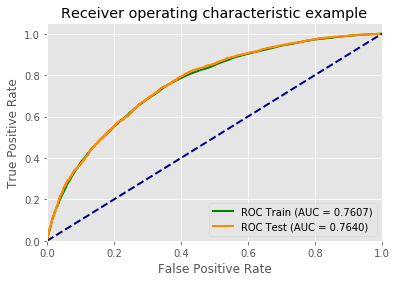

In [59]:
# Import logistic regression from sklearn
from sklearn.linear_model import LogisticRegression

# Initialize model by providing parameters
# http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
clf = LogisticRegression(C=1.0, penalty='l2')

# Fit a model by providing X and y from training set
clf.fit(X_train, y_train)

# Make prediction on the training data
y_train_pred = clf.predict(X_train)
p_train_pred = clf.predict_proba(X_train)[:,1]

# Make predictions on test data
y_test_pred = clf.predict(X_test)
p_test_pred = clf.predict_proba(X_test)[:,1]

# print model results
get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred)
plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred)

### Hand-tuned model: Bagging - Single Tree

              train      test
metrics                      
AUC        0.872448  0.833937
Accuracy   0.800100  0.771800
Precision  0.827239  0.804605
Recall     0.858809  0.838586
f1-score   0.842728  0.821244


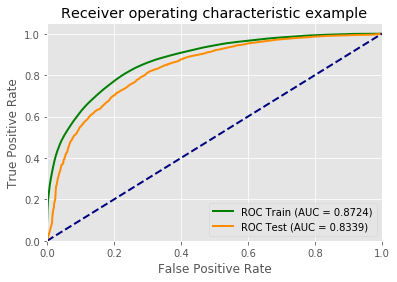

In [60]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=10,min_samples_leaf=5)

# Fit a model by providing X and y from training set
clf.fit(X_train, y_train)

# Make prediction on the training data
y_train_pred = clf.predict(X_train)
p_train_pred = clf.predict_proba(X_train)[:,1]

# Make predictions on test data
y_test_pred = clf.predict(X_test)
p_test_pred = clf.predict_proba(X_test)[:,1]

# print model results
get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred)
plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred)

### Hand-tuned model: Bagging - Bagged Trees

              train      test
metrics                      
AUC        0.886785  0.855472
Accuracy   0.808450  0.785400
Precision  0.825984  0.806389
Recall     0.877771  0.864182
f1-score   0.851090  0.834286


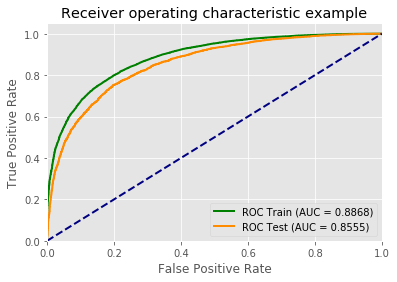

In [62]:
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html 
from sklearn.ensemble import BaggingClassifier

base_classifier = DecisionTreeClassifier(max_depth=10,min_samples_leaf=5)

# Choose some parameter combinations to try
parameters = {
              'base_estimator':base_classifier,
              'n_estimators': 200,
              'n_jobs': -1
              }

clf = BaggingClassifier(**parameters)

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)

### Hand-tuned model: Single KNN

              train      test
metrics                      
AUC        0.872334  0.811493
Accuracy   0.792200  0.757000
Precision  0.837973  0.806612
Recall     0.826619  0.804031
f1-score   0.832257  0.805320


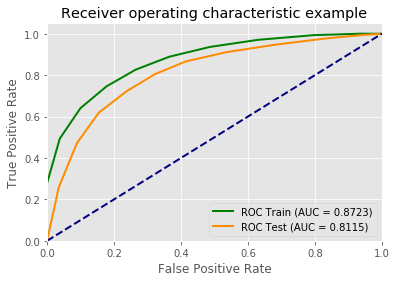

In [63]:
from sklearn.neighbors import KNeighborsClassifier
parameters = {
    #'weights':'distance',
    'n_neighbors':10,
    'leaf_size':5
}
base_classifier = KNeighborsClassifier(**parameters)
clf = base_classifier

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)

### Hand-tuned model: Bagged KNN

              train      test
metrics                      
AUC        0.879621  0.818238
Accuracy   0.799075  0.764000
Precision  0.822155  0.793660
Recall     0.864903  0.841145
f1-score   0.842987  0.816713


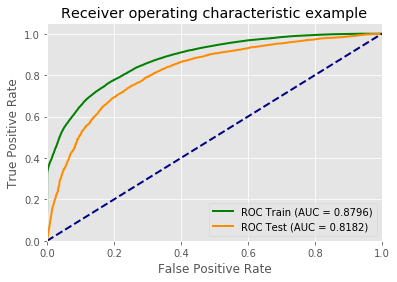

In [67]:
from sklearn.ensemble import BaggingClassifier

# Choose some parameter combinations to try
parameters = {
              'base_estimator':base_classifier,
              'n_estimators': 100,
              'n_jobs': -1
              }

clf = BaggingClassifier(**parameters)

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)

### Hand-tuned model: Random Forest

              train      test
metrics                      
AUC        0.873301  0.854833
Accuracy   0.800900  0.785700
Precision  0.815339  0.801615
Recall     0.880056  0.873300
f1-score   0.846462  0.835924


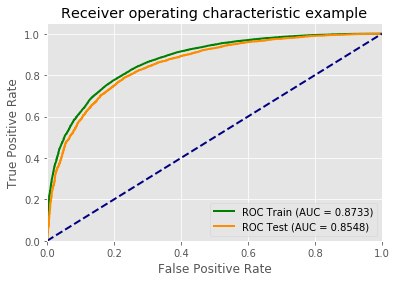

In [65]:
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.ensemble import RandomForestClassifier

# Choose some parameter combinations to try
parameters = {'n_estimators': 200,
              'max_features': 'auto',
              'criterion': 'gini',
              'max_depth': 10,
              'min_samples_split': 20,
              'min_samples_leaf': 2,
              'random_state': 0,
              'n_jobs': -1
              }

clf = RandomForestClassifier(**parameters)

# Fit a model by providing X and y from training set
clf.fit(X_train, y_train)

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)

### Hand-tuned model: Gradient Boosting Trees

              train      test
metrics                      
AUC        0.887699  0.864592
Accuracy   0.815250  0.794600
Precision  0.831389  0.813443
Recall     0.882782  0.871221
f1-score   0.856315  0.841341


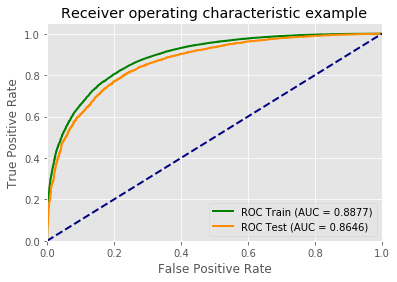

In [68]:
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
from sklearn.ensemble import GradientBoostingClassifier

# Choose some parameter combinations to try
parameters = {
    'n_estimators': 200,
    'max_depth': 5,
    'learning_rate': 0.1,
    'random_state': 42
}

# parameters = {
#     'n_estimators': 50,
#     'max_depth': 5,
#     'learning_rate': 0.2,
#     'subsample': 0.7,
#     'max_features':0.8,
#     'random_state': 42
# }

clf = GradientBoostingClassifier(**parameters)

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)

### Hand-tuned model: Neural Network

              train      test
metrics                      
AUC        0.831193  0.830426
Accuracy   0.766875  0.767400
Precision  0.803726  0.802435
Recall     0.828503  0.832987
f1-score   0.815926  0.817425


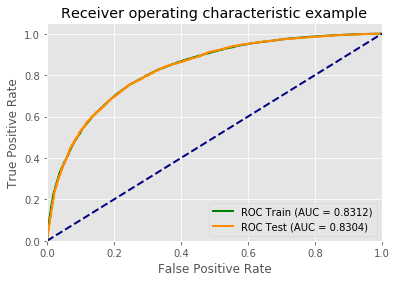

In [69]:
# http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier
from sklearn.neural_network import MLPClassifier

# Choose some parameter combinations to try
parameters = {
    'solver':'adam', 
    'activation':'relu',
    'alpha':1e-5, #increase alpha->increase penalty :: http://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py
    'hidden_layer_sizes':(20,10,5), 
    'learning_rate':'adaptive',
    'random_state':1
    }
clf = MLPClassifier(**parameters)

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)

### Hand-tuned model: Linear SVM

              train      test
metrics                      
AUC        0.519207  0.521847
Accuracy   0.636200  0.639800
Precision  0.632845  0.635582
Recall     0.992383  0.993281
f1-score   0.772845  0.775156


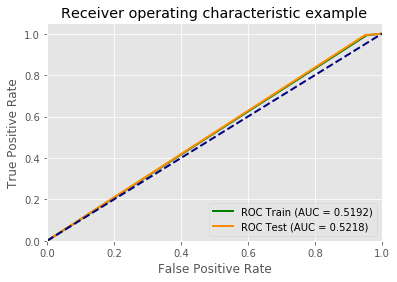

In [70]:
from sklearn.svm import LinearSVC

# Choose some parameter combinations to try
clf = LinearSVC()

# Fit a model by providing X and y from training set
clf.fit(X_train, y_train)

# No predict_proba for LinearSVC

# Make prediction on the training data
p_train_pred = clf.predict(X_train)

# Make predictions on test data
p_test_pred = clf.predict(X_test)

# print model results
get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred)
plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred)

### Hand-tuned model: NonLinear SVM

/Users/meinawang/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


              train      test
metrics                      
AUC        0.633355  0.588211
Accuracy   0.429725  0.405600
Precision  0.654280  0.587564
Recall     0.181399  0.164774
f1-score   0.284046  0.257371


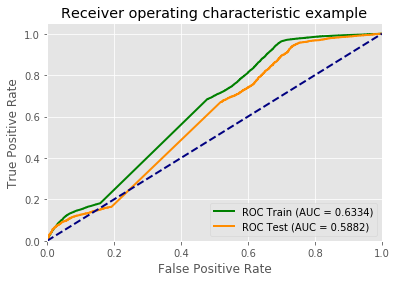

In [71]:
# http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
from sklearn.svm import SVC

# Choose some parameter combinations to try
parameters = {
    'probability':True, # get simulated probability
    'max_iter':3000
    }
clf = SVC(**parameters)    

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)

c.	Implement grid search code for every algorithm, and explore a few variations of hyperparameter sets. Compare grid search results with hand tuned results.



### Grid Search: Logistic Regression

In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, roc_auc_score, accuracy_score
from sklearn.model_selection import GridSearchCV

# Choose the type of classifier. 
clf = LogisticRegression()

# Choose some parameter combinations to try
param_grid = {'C' :[0.5,0.75,1.0,1.25,1.5],
             'penalty' :['l2']}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(roc_auc_score)

# Run the grid search
# read theory
grid_obj = GridSearchCV(clf, param_grid, cv=5, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
clf.fit(X_train, y_train)


LogisticRegression(C=1.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

              train      test
metrics                      
AUC        0.760681  0.764023
Accuracy   0.717475  0.721800
Precision  0.735859  0.739208
Recall     0.853237  0.857463
f1-score   0.790213  0.793956


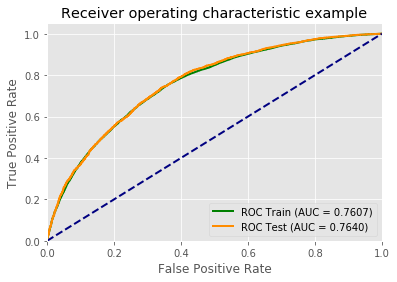

In [117]:
train_test_model(clf, X_train, y_train, X_test, y_test)

### Grid Search: Bagging - Single Tree

In [79]:
from sklearn.tree import DecisionTreeClassifier

# Choose the type of classifier. 
clf = DecisionTreeClassifier()

# Choose some parameter combinations to try
param_grid = {'max_depth':[5,10,15,20],
             'min_samples_leaf':[2,5,7,10]}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(roc_auc_score)

# Run the grid search
# read theory
grid_obj = GridSearchCV(clf, param_grid, cv=5, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
clf.fit(X_train, y_train)
#train_test_model(clf, X_train, y_train, X_test, y_test)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=7, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

              train      test
metrics                      
AUC        0.871267  0.833543
Accuracy   0.799000  0.772200
Precision  0.828010  0.806322
Recall     0.855362  0.836506
f1-score   0.841464  0.821137


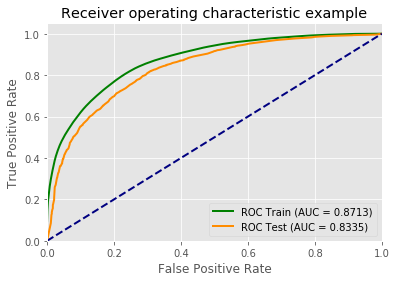

In [80]:
train_test_model(clf, X_train, y_train, X_test, y_test)

### Grid Search: Bagging - Bagged Trees

In [83]:
from sklearn.ensemble import BaggingClassifier

base_classifier = DecisionTreeClassifier(max_depth=10,min_samples_leaf=5)

# Choose some parameter combinations to try
parameters = {'base_estimator':base_classifier,
              'n_jobs': -1
              }

clf = BaggingClassifier(**parameters)

# Choose some parameter combinations to try
param_grid = {
             'n_estimators':[50,100,200]}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(roc_auc_score)

# Run the grid search
# read theory
grid_obj = GridSearchCV(clf, param_grid, cv=5, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
clf.fit(X_train, y_train)


BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=200, n_jobs=-1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

              train      test
metrics                      
AUC        0.886906  0.855710
Accuracy   0.807700  0.783200
Precision  0.825442  0.805477
Recall     0.877130  0.861142
f1-score   0.850501  0.832380


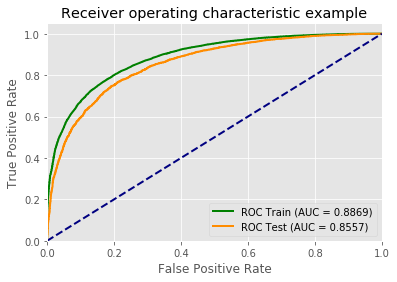

In [84]:
train_test_model(clf, X_train, y_train, X_test, y_test)

### Grid Search: Single KNN

In [86]:
from sklearn.neighbors import KNeighborsClassifier
parameters = {
    #'weights':'distance',
}
base_classifier = KNeighborsClassifier(**parameters)
clf = base_classifier

# Choose some parameter combinations to try
param_grid = {'n_neighbors':[5,10,15,20],
             'leaf_size':[2,5,7,10]}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(roc_auc_score)

# Run the grid search
# read theory
grid_obj = GridSearchCV(clf, param_grid, cv=5, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
clf.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=10, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

              train      test
metrics                      
AUC        0.872362  0.811584
Accuracy   0.792225  0.757000
Precision  0.838062  0.806612
Recall     0.826538  0.804031
f1-score   0.832260  0.805320


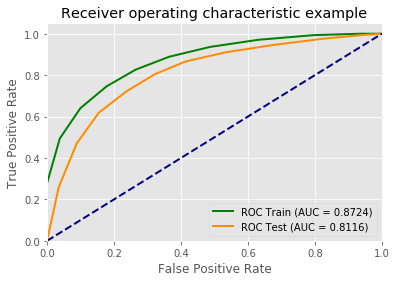

In [87]:
train_test_model(clf, X_train, y_train, X_test, y_test)

### Grid Search: Bagged KNN

In [91]:
from sklearn.ensemble import BaggingClassifier

# Choose some parameter combinations to try
parameters = {
              'base_estimator':base_classifier,

              'n_jobs': -1
              }

clf = BaggingClassifier(**parameters)


# Choose some parameter combinations to try
param_grid = {'n_estimators':[50,100,200]}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(roc_auc_score)

# Run the grid search
# read theory
grid_obj = GridSearchCV(clf, param_grid, cv=5, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
clf.fit(X_train, y_train)


BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=200, n_jobs=-1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

              train      test
metrics                      
AUC        0.918363  0.810881
Accuracy   0.828050  0.754300
Precision  0.846709  0.786556
Recall     0.884386  0.832987
f1-score   0.865137  0.809106


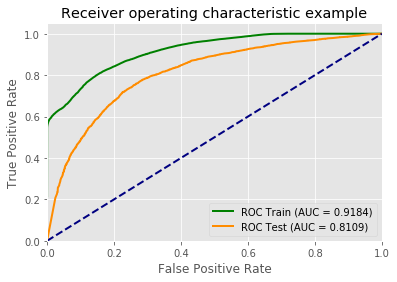

In [92]:
train_test_model(clf, X_train, y_train, X_test, y_test)

### Grid Search: Random Forest

In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, roc_auc_score, accuracy_score
from sklearn.model_selection import GridSearchCV

# Choose the type of classifier. 
clf = RandomForestClassifier()

# Choose some parameter combinations to try
param_grid = {'n_estimators': [50,100,200], 
              'max_features': ['auto'], 
              'criterion': ['gini'],
              'max_depth': [5,10,15,20,25], 
              'min_samples_split': [2],
              'min_samples_leaf': [2,10,20],
              'n_jobs':[-1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(roc_auc_score)

# Run the grid search
# read theory
grid_obj = GridSearchCV(clf, param_grid, cv=5, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
clf.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

              train      test
metrics                      
AUC        0.878777  0.855329
Accuracy   0.803775  0.784800
Precision  0.818646  0.801441
Recall     0.880377  0.871701
f1-score   0.848390  0.835096


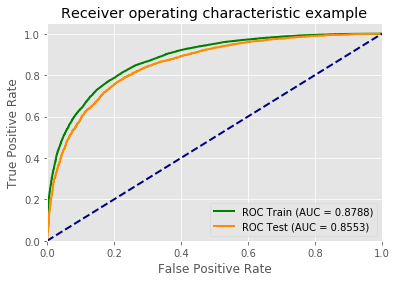

In [94]:
train_test_model(clf, X_train, y_train, X_test, y_test)

### Grid Search: Gradient Boosting Trees

In [101]:
from sklearn.ensemble import GradientBoostingClassifier

# Choose some parameter combinations to try
parameters = {}


clf = GradientBoostingClassifier(**parameters)

# Choose some parameter combinations to try
param_grid = {'n_estimators': [100,200],
              'learning_rate':[0.1,0.3,0.5],
              'max_depth': [5,10,15], 
              'random_state':[42],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(roc_auc_score)

# Run the grid search
# read theory
grid_obj = GridSearchCV(clf, param_grid, cv=5, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
clf.fit(X_train, y_train)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              presort='auto', random_state=42, subsample=1.0, verbose=0,
              warm_start=False)

              train      test
metrics                      
AUC        0.887699  0.864592
Accuracy   0.815250  0.794600
Precision  0.831389  0.813443
Recall     0.882782  0.871221
f1-score   0.856315  0.841341


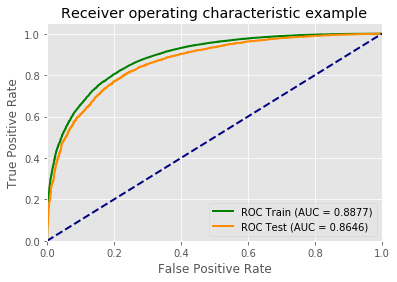

In [102]:
train_test_model(clf, X_train, y_train, X_test, y_test)

### Grid Search: Neural Network

In [104]:
from sklearn.neural_network import MLPClassifier

# Choose some parameter combinations to try
parameters = {}
clf = MLPClassifier(**parameters)

# Choose some parameter combinations to try
param_grid = {'solver':['adam'],
              'activation':['relu'],
              'alpha':[1e-4,1e-5,1e-6],
              'hidden_layer_sizes':[(5,5),(10,5),(20,10,5)],
              'learning_rate':['adaptive'],
              'random_state':[1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(roc_auc_score)

# Run the grid search
# read theory
grid_obj = GridSearchCV(clf, param_grid, cv=5, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
clf.fit(X_train, y_train)


MLPClassifier(activation='relu', alpha=1e-06, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 5), learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

              train      test
metrics                      
AUC        0.823236  0.821888
Accuracy   0.763175  0.766000
Precision  0.777455  0.779317
Recall     0.868992  0.872820
f1-score   0.820679  0.823423


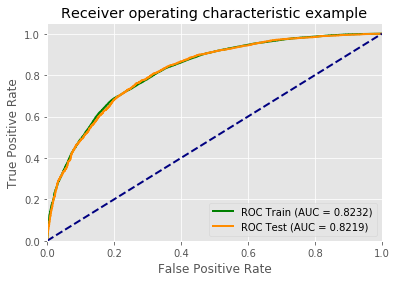

In [105]:
train_test_model(clf, X_train, y_train, X_test, y_test)

### Grid Search: Linear SVM

In [114]:
from sklearn.svm import LinearSVC

# Choose some parameter combinations to try
clf = LinearSVC()

# Choose some parameter combinations to try
param_grid = {'loss':['squared_hinge','hinge']
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(roc_auc_score)

# Run the grid search
# read theory
grid_obj = GridSearchCV(clf, param_grid, cv=5, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
clf.fit(X_train, y_train)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

              train      test
metrics                      
AUC        0.552591  0.556711
Accuracy   0.659000  0.664100
Precision  0.649795  0.653275
Recall     0.982963  0.985922
f1-score   0.782387  0.785846


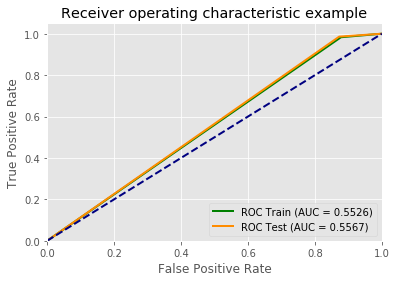

In [115]:
# Make prediction on the training data
p_train_pred = clf.predict(X_train)

# Make predictions on test data
p_test_pred = clf.predict(X_test)

# print model results
get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred)
plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred)

### Grid Search: NonLinear SVM

In [112]:
from sklearn.svm import SVC

# Choose some parameter combinations to try
parameters = {'probability':True}
clf = SVC(**parameters)    

# Choose some parameter combinations to try
param_grid = {}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(roc_auc_score)

# Run the grid search
# read theory
grid_obj = GridSearchCV(clf, param_grid, cv=5, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
clf.fit(X_train, y_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

              train      test
metrics                      
AUC        0.867675  0.818605
Accuracy   0.804550  0.765100
Precision  0.812297  0.783576
Recall     0.892924  0.862422
f1-score   0.850705  0.821110


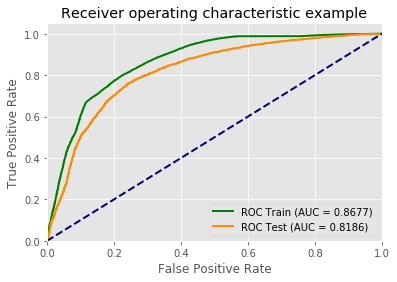

In [113]:
train_test_model(clf, X_train, y_train, X_test, y_test)

d.	Rank the algorithms based on best possible performance (best among hand tuned or grid search, results should be table or bar chart). Discuss why the ranking you have is reasonable based on the pros and cons of each algorithm.



| Ranking | Model   |  AUC on test data |
|---------------------|--------------------------------|-----------------------------------|
|   1   |    Gradient Boosting Trees         |     0.865      |
|   2     |     Bagging - Bagged Trees    |      0.856    |
|   3    |   Random Forest     |     0.855       |
|   4|    Bagging - Single Tree     |        0.834     |
|   5  |     Neural Network       |      0.830         |
|   6 |     NonLinear SVM      |      0.819          |
|  7  |     Bagged KNN     |      0.818         |
|  8 |       Single KNN    |      0.812      |
|  9 |    Logistic Regression      |      0.764         |
|  10 |   Linear SVM     |      0.557          |

- (Rank 1) Based on the models' performance from the above table, the tree models are general perform better in this case.  This might due to the tree models better captures the non-linear relationships between the target feature and the predictors than linear models.  Also, tree models handle data of mixed type naturally.  <br>Among the tree models, the Gradient Boosting Trees achieved the highest AUC value on test data, which is reasonable, since boosting fits data sequentially, and it puts more emphasis on where the previous learners get wrong, thus improve the performance.  <br>
- (Rank 2-3) The performace from bagging-bagged trees is very close random forest.  As random forest is a refinement of bagged trees with feature random sampling.  By doing that, random forest improves bagging by de-correlate the trees.  
- (Rank 4) Both the bagging-bagged trees and random forest would have better performance comparing to bagging-single tree, which matches the results from the above table.  <br>
- (Rank 5) The performance of a neural network largely depend on the size the of the data, the more data, the better performance the neural network would have.  Therefore, in this case, the tree models outperform deep learning. 
- (Rank 6) The SVM is actually related to neural network in that the svm is actually a single-layer NN.  Also, in general, non-linear SVM tends to perform better than linear SVM.  This also matches with our observation here.  SVM is also not that sensitive to outliers.
- (Rank 7-8) KNN is very sensitive to bad features and outliers, and the choice of K is very important.  Even thought the algorithm of KNN is intuitive, but it is not the state of the art algorithm for classification now.  Unless the problem is very simple, SVM will outperform KNN almost always.  
- (Rank 9) Logistic regression has several disadvantages comparing to SVM and KNN.  Logistic regression learns a linear decision boundary, while the other two can have non-linear boundaries as well.  Logistic regression predicts probabilities, while the KNN outputs labels, and the SVM is also a hard classifier.  SVM is a improved method comparing to logistic regression in that it tries to find the maximum margin for classification, while the logistic regression would just find one that would work, which probability not being the best one.  Also, logistic regression would require more features in order to acchieve better results.
- (Rank 10) The worst performance model is the linear SVM, which is a linear classifier, therefore could not capture the non-linear relationship in this problem.

## Question 2

What percentage of unique records in a bootstrap sample compared with original data as the number of records N -> infinity? Can you derive it?

Suppose we have a total number of $n$ samples.  We draw sample $i$ randomly with replacement from the $n$ samples.  If the sample i get picked, then $X_i = 1$; if not, then $X_i = 0$. <br>

Then we have the expectation of $X_i$ is $E(X_i) = 1*P(X_i = 1) + 0*P(X_i = 0) = 1*P(X_i = 1) = 1 - P(X_i = 0)$. <br>

$P(X_i = 0)$ is the probability $i$ does not get picked, and the probability is $\frac{n - 1}{n}$ (pick any expect i from n).  Therefore, the probability $i$ does not get picked in any of the draw is $(\frac{n - 1}{n})^n$<br>

Based on the above, the expected value of unique records N is, <br>

$E(N) = \sum\limits_{i=1}^N E(X_i) = \sum\limits_{i=1}^N (1 - (\frac{N - 1}{N})^N) = N - \frac{N(N - 1)^N}{N^N} = N - \frac{(N - 1)^N}{N^{N-1}} $


The percentage of unique values compared with original data is therefore, <br>
$\frac{N - \frac{(N - 1)^N}{N^{N-1}}}{N} = 1 - \frac{(N - 1)^N}{N} = 1 - (1 - \frac{1}{N})^N$ <br>
As the number of records N -> infinity,

$\lim_{N\to\infty} 1 - (1 - \frac{1}{N})^N = 1 - \frac{1}{e} \approx 0.632$<br>


We can also write plot this function as shown below.

In [39]:
import numpy as np
x = np.arange(1.,100.,1.)

In [40]:
y = 1 - (1 - 1/x)**x

2.718281828459045


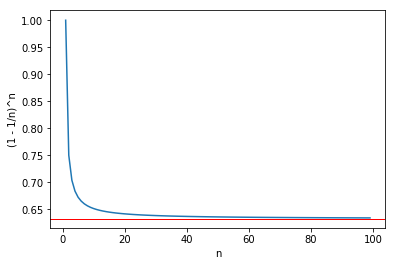

In [41]:
import matplotlib.pyplot as plt
plt.plot(x, y)
plt.xlabel('n')
plt.ylabel('(1 - 1/n)^n')
e = np.exp(1)
print e
plt.axhline(y=1 - 1/e,color='r',linewidth=1)
plt.show()